<a href="https://colab.research.google.com/github/rajy4683/EVAP2/blob/master/EVA4P2_S2_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Jul 28 11:54:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Dependencies


In [4]:
%run '/content/drive/My Drive/EVA4/default_setup.py'

Installing mandatory requirements
Installing albumentations
System imports completed


  pip install torch-lr-finder -v --global-option="amp"


Dev imports completed


In [7]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [5]:
!cp /content/drive/My\ Drive/EVA4/Flying\ Birds.zip /content/FlyingBirds.zip
!cp /content/drive/My\ Drive/EVA4/Large\ QuadCopters-20200723T085054Z-001.zip /content/LargeQuadCopters.zip
!cp /content/drive/My\ Drive/EVA4/Small\ QuadCopters.zip /content/SmallQuadCopters.zip
!cp /content/drive/My\ Drive/EVA4/Winged\ Drones-20200723T075457Z-001.zip /content/WingedDrones.zip

!ls -1 /content/*zip |while read line; do unzip -q $line;done

In [ ]:
!file /content/drive/My\ Drive/EVA4/S2.zip

/bin/bash: file: command not found


In [ ]:
# file_list = glob.glob("/content/drive/My Drive/EVA4/Session 2 Dataset/*/*.*",recursive=True)
# file_path = "/content/drive/My Drive/EVA4/Session 2 Dataset/"
# classes = ['Flying Birds', 'Small QuadCopters']
# for single_class in classes:
#     file_local_list = glob.glob(file_path+single_class+"/*.*",recursive=True)
#     with ZipFile(single_class+'.zip','w') as zipObj:
#         for file_name in file_local_list:
#             zipObj.write(file_name,arcname=os.path.join(single_class,os.path.basename(file_name)))
#     zipObj.close() 
#     #file_list = glob.glob("/content/drive/My Drive/EVA4/Session 2 Dataset//*.*",recursive=True)
#     print('{}: {}'.format(single_class, len(file_local_list)))

In [ ]:
file_list = glob.glob("/content/*/*.*",recursive=True)
len(file_list)


21811

In [ ]:
df_birds = pd.DataFrame(columns=['FileName', 'DirName', 'Extn', 'Size', 'ClassName'])


In [ ]:
for file_name in file_list:
    base_name, dir_name = os.path.basename(file_name), os.path.dirname(file_name) 
    extn = base_name.split(".")[-1]
    classname = os.path.basename(dir_name)
    row_val = {'FileName':base_name, 'DirName':dir_name, 'Extn':extn, 'Size': int(os.path.getsize(file_name)/1024), 'ClassName':classname }
    df_birds = df_birds.append(row_val,ignore_index=True)
    #print("FileName: {} Size: {}KB".format(file_name, int(os.path.getsize(file_name)/1024)))
    


In [ ]:
# lgq_zip_file = "/content/drive/My Drive/EVA4/Large QuadCopters-20200723T085054Z-001.zip"
# zipobj = ZipFile(lgq_zip_file)
# len(zipobj.namelist())

In [ ]:
def lowercase_simplify_filenames(file_name):
    local_file_name = file_name.lower()
    if re.match('jpeg',local_file_name):
        local_file_name='jpg'
    return local_file_name

In [ ]:
df_birds.loc[:,'Extn'] = df_birds.loc[:,'Extn'].apply(lowercase_simplify_filenames)

In [ ]:
df_birds.groupby(by='Extn')['FileName'].count().index.values

array(['csv', 'gif', 'ipynb', 'jfif', 'jpg', 'json', 'md', 'png', 'ppm',
       'svg', 'txt', 'webp'], dtype=object)

Text(0.5, 1.0, 'Extensions-wise Filecount in Log')

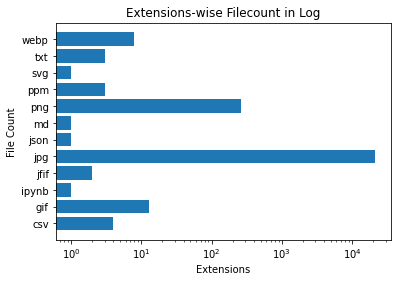

In [ ]:
plt.barh(df_birds.groupby(by='Extn')['FileName'].count().index.values, df_birds.groupby(by='Extn')['FileName'].count().values,log=True)
plt.xlabel("Extensions")
plt.ylabel("File Count")
plt.title("Extensions-wise Filecount in Log" )

In [ ]:
df_birds.loc[:,'Extn'].unique()

array(['jpg', 'png', 'gif', 'svg', 'webp', 'ppm'], dtype=object)

In [ ]:
os.stat('/content/drive/My Drive/EVA4/Session 2 Dataset/Large QuadCopters/Amazon Prime Air Private Trial Flying-HIGH RES.jpg.png')

os.stat_result(st_mode=33152, st_ino=2192, st_dev=81, st_nlink=1, st_uid=0, st_gid=0, st_size=66473448, st_atime=0, st_mtime=1595183870, st_ctime=1595183920)

In [ ]:
!cp -R "/content/drive/My Drive/EVA4/Session 2 Dataset/" /content

In [ ]:
df_birds = df_birds.loc[100:,:]

In [ ]:
df_birds['Extn'].unique()

array(['jpg', 'png', 'jpeg', 'gif', 'JPG', 'jfif', 'txt', 'JPEG', 'webp',
       'ipynb', 'svg', 'ppm', 'Jpg', 'PNG'], dtype=object)

In [ ]:
jpg_extn = 'jpg'
df_jpg_1000 =df_birds.query('Extn == @jpg_extn and Size < 10000')

In [ ]:
df_jpg_1000.to_csv('/content/drive/My Drive/EVA4/df_s2_jpg1000.csv',index=False)

In [ ]:
df_jpg_1000 = pd.read_csv('/content/drive/My Drive/EVA4/df_s2_jpg1000.csv')

In [ ]:
df_jpg_1000

FileName  ...          ClassName
0                                        quadcopters.jpg  ...  Large QuadCopters
1                                          images158.jpg  ...  Large QuadCopters
2                                               ii14.jpg  ...  Large QuadCopters
3                                            drone1e.jpg  ...  Large QuadCopters
4      pro_1001278_phppR4S3D5ce7e7760aaa54.05195579.jpeg  ...  Large QuadCopters
...                                                  ...  ...                ...
21438               d4a2d81bbbb51819953b05bd10825435.jpg  ...  Small QuadCopters
21439               a3ef6b22c441667f5984d101368b2bdd.jpg  ...  Small QuadCopters
21440                                   images (19).jpeg  ...  Small QuadCopters
21441                             images(124)_copter.jpg  ...  Small QuadCopters
21442                                  images (258).jpeg  ...  Small QuadCopters

[21443 rows x 5 columns]

In [ ]:
def identify_image_resolution(img_file_name):#, base_name):
    img_file = os.path.join(img_file_name['DirName'], img_file_name['FileName'])
    img_type='square'
    with Image.open(img_file) as img_file:
        width, height = img_file.size
    if width != height:
        img_type='rectangle'
    return width,height, img_type

In [ ]:
df_jpg_1000['Width'] = df_jpg_1000['Height'] = df_jpg_1000['Orientation'] = ""

In [ ]:
df_jpg_1000[['Width', 'Height', 'Orientation']] = df_jpg_1000.loc[:,['FileName','DirName']].apply(identify_image_resolution,axis=1).tolist()

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
df_jpg_1000 = pd.concat([df_jpg_1000, pd.get_dummies(df_jpg_1000['ClassName'], prefix='ClassName')], axis=1)

In [ ]:
df_jpg_1000['ClassName'].unique()

array(['Large QuadCopters', 'Flying Birds', 'Winged Drones',
       'Small QuadCopters'], dtype=object)

In [ ]:
df_jpg_1000.to_csv('/content/drive/My Drive/EVA4/df_s2_jpg1000_dimupdate.csv',index=False)

In [ ]:
df_jpg_1000 = pd.read_csv('/content/drive/My Drive/EVA4/df_s2_jpg1000_dimupdate.csv')

In [ ]:
class_name_idx = df_jpg_1000['ClassName'].unique()
print(np.where(class_name_idx == 'Small QuadCopters')[0][0])

3


In [ ]:
df_jpg_1000.iloc[:,12].values

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
df_jpg_1000.loc[:,'ClassMap'] = df_jpg_1000.loc[:,'ClassName'].apply(lambda x: np.where(class_name_idx == x)[0][0])

In [ ]:
def split_df(df_data_list, split_pct=0.7):
    full_set = df_data_list.index.values
    train_set = df_data_list.sample(frac=split_pct).index.values
    test_set  = np.random.permutation([ index_val for index_val in full_set if index_val not in train_set])

    df_train = df_data_list.loc[train_set].reset_index()
    df_train.drop('index',axis=1,inplace=True)

    df_test = df_data_list.loc[test_set].reset_index()
    df_test.drop('index',axis=1,inplace=True)
    return df_train, df_test

In [ ]:
df_train, df_test = split_df(df_jpg_1000, 0.8)

In [ ]:
 df_train.to_csv('/content/drive/My Drive/EVA4/S2_Train.csv', index=False)
 df_test.to_csv('/content/drive/My Drive/EVA4/S2_Test.csv', index=False)

In [ ]:
df_train.count()[0]

4289

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/EVA4/S2_Train.csv')
df_test = pd.read_csv('/content/drive/My Drive/EVA4/S2_Test.csv')
print(df_train.count()[0], df_test.count()[0])

17154 4289


In [ ]:
df_train['ClassName'].unique()

array(['Flying Birds', 'Large QuadCopters', 'Winged Drones',
       'Small QuadCopters'], dtype=object)

In [ ]:
os.path.join('/content',df_train.iloc[100,4],df_train.iloc[100,0])

'/content/Winged Drones/Image_846.jpg'

In [ ]:
df_jpg_1000.loc[df_jpg_1000['Width'].idxmax(),:]

FileName       pexels-photo-23448620.jpeg
DirName             /content/Flying Birds
Extn                                  jpg
Size                                 6197
ClassName                    Flying Birds
Width                                7952
Height                               5304
Orientation                     rectangle
Name: 4536, dtype: object

Text(0.5, 1.0, 'Classwise Filecount')

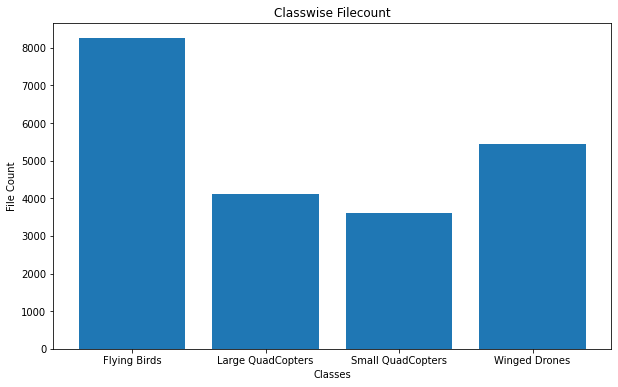

In [ ]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(10,6))
plt.bar(df_birds_grp['FileName'].count().index.values, df_birds_grp['FileName'].count().values)
plt.xlabel("Classes")
plt.ylabel("File Count")
plt.title("Classwise Filecount")

In [ ]:
df_birds_grp.count()

FileName  DirName  Extn  Size  Width  Height  Orientation
ClassName                                                                   
Flying Birds           8255     8255  8255  8255   8255    8255         8255
Large QuadCopters      4125     4125  4125  4125   4125    4125         4125
Small QuadCopters      3613     3613  3613  3613   3613    3613         3613
Winged Drones          5450     5450  5450  5450   5450    5450         5450

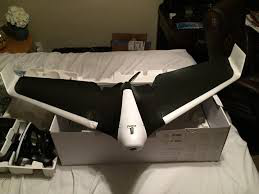

In [ ]:
idx_val = 22
myimg = Image.open(os.path.join('/content',df_test.iloc[idx_val,:]['ClassName'],df_test.iloc[idx_val,:]['FileName']))
print(myimg.)
display(myimg)

In [ ]:
%load_ext autoreload
%autoreload 2

from RekogNizer import dataloader
transform = resize_bg(224,224, [0.485, 0.456, 0.406],[0.229, 0.224, 0.225] )
mydataset = dataloader.QDFDataSet('/content/drive/My Drive/EVA4/S2_Train.csv', transform=transform)
next(iter(mydataset))
mydataloader = torch.utils.data.DataLoader(mydataset, 16,
                                         shuffle=False, num_workers=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
for line_count, val in enumerate(iter(mydataset)):
    print(line_count, val[1])

In [ ]:
next(iter(mydataloader.dataset))

In [ ]:
for data,target in mydataloader:
    print(target)

tensor([1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 3, 2, 3, 2, 2, 3, 1, 1, 2, 0, 1, 0, 3, 0,
        2, 0, 1, 1, 0, 3, 2, 1])


ValueError: ignored

In [ ]:
mycifar10 = dataloader.MyCIFAR10(root='./data', train=True, download=True, transform=None)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
next(iter(mycifar10))

In [ ]:
model_new = torch.hub.load('pytorch/vision:v0.6.0', 'mobilenet_v2', pretrained=True)

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


In [ ]:
model_new.eval()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MobileNetV2Mod(nn.Module):
    def __init__(self, base_model, n_class, dropout_val=0.2):
        super().__init__()
        #self.base_model = torch.hub.load('pytorch/vision:v0.6.0', 'mobilenet_v2', pretrained=True)
        #self.base_layers = list(self.base_model.children())[:-1]
        self.core_layers = nn.Sequential(*list(base_model.children())[:-1])
        self.classes = n_class
        self.dropout_val = dropout_val
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
                                         nn.Linear(in_features=1280, out_features=n_class))
    def forward(self, x):
        x = self.core_layers(x)
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)



        #x = x.view(x.size(0), -1)
        #print(x.size(0))
        #x = self.final_layer(x)
        #x = x.view(-1, self.classes)
        x = F.log_softmax(x, dim=1)
        return x

In [ ]:
new_model = MobileNetV2Mod(model_new, 4)
#new_model.eval()
summary(model_new.to("cuda"), input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [ ]:
list(model_new.children())

### Training Scripts

In [8]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_eva4_s2.py -p '{"lr":0.015084, "ocp_max_lr":0.0003981071705534973, "anneal_strategy":"cos","div_factor":128,"final_div_factor":64, "momentum":0.85, "epochs":50, "batch_size":256}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.0003981071705534973
Setting  anneal_strategy  =  cos
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.85
Setting  epochs  =  50
Setting  batch_size  =  256
Final Hyperparameters
             dropout : 0.1 
          batch_size : 256 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.85 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.0003981071705534973 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : cos 
           pct_start : 0.208 
      cycle_momentum : False 
           lr_policy : ocp 
          

In [ ]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_eva4_s2.py -p '{"lr":0.015084, "epochs":24, "batch_size":64}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  epochs  =  24
Setting  batch_size  =  64
Final Hyperparameters
             dropout : 0.1 
          batch_size : 64 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.9 
             no_cuda : False 
                seed : 1 
              epochs : 24 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.5 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : linear 
           pct_start : 0.208 
      cycle_momentum : False 
           lr_policy : ocp 
           split_pct : 0.208 
Initializing datasets and dataloaders
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
wandb: Tracking run with wandb version 0.9.4
wandb: Run data 

In [ ]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_eva4_s2.py -p '{"lr":0.015084, "epochs":50, "batch_size":128}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  epochs  =  50
Setting  batch_size  =  128
Final Hyperparameters
             dropout : 0.1 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.9 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.5 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : linear 
           pct_start : 0.208 
      cycle_momentum : False 
           lr_policy : ocp 
           split_pct : 0.208 
Initializing datasets and dataloaders
Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https:

In [ ]:
summary(model_new.to("cuda"), input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [ ]:
!cp /content/drive/My\ Drive/EVA4/RekogNizer/train_s12_new.py /content/drive/My\ Drive/EVA4/RekogNizer/train_eva4_s2.py

In [ ]:
random.seed(42)

#cv2.imread('images/parrot.jpg')

flip = A.Compose([
    A.IAAFliplr(p=1,always_apply=True),
    # A.RandomBrightnessContrast(p=1),    
    # A.RandomGamma(p=1),    
    # A.CLAHE(p=1),    
], p=1)

resize_bg = A.Compose([
    A.Resize(250,250,always_apply=True,p=1),
    #A.CLAHE(p=1),
    #A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
], p=1)


strong = A.Compose([
    A.ChannelShuffle(p=1),
], p=1)

base_tensor = A.Compose([
    A.pytorch.ToTensor(),
], p=1)

def resize_bg(h,w,mean,std):
    return A.Compose([
    A.Resize(h,w,always_apply=True,p=1),
    A.Normalize(
        mean=mean, std=std
        ),
    A.pytorch.ToTensor(),
    #A.ToGray(always_apply=True,p=1)
    #A.CLAHE(p=1),
    #A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
], p=1)

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [ ]:
######## OCP 
from RekogNizer import mmdmodels
from tqdm import tqdm
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['lr'] = 0.02754228703338166 #6.2500e-01 #0.1
hyperparams.hyperparameter_defaults['ocp_max_lr'] = 0.02754228703338166 #6.2500e-01 #0.1

print("Initializing datasets and dataloaders")    
model_new =  torch.hub.load('pytorch/vision:v0.6.0', 'mobilenet_v2', pretrained=True)
new_model = MobileNetV2Mod(model_new, 4)
#new_model.eval()
#summary(new_model.to("cuda"), input_size=(3,224,224))


wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")

# optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
#                         weight_decay=0)
optimizer=optim.SGD(new_model.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=2e-5)
#expand_model_params
# criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
#            "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

criterion=nn.CrossEntropyLoss


scheduler = None
#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
# scheduler = OneCycleLR(optimizer, 
#                         config.ocp_max_lr, 
#                         epochs=config.epochs, 
#                         cycle_momentum=True, 
#                         steps_per_epoch=len(train_loader), 
#                         base_momentum=config.momentum,
#                         max_momentum=0.95, 
#                         pct_start=0.208,
#                         anneal_strategy=config.anneal_strategy,
#                         div_factor=config.div_factor,
#                         final_div_factor=config.final_div_factor
#                            )

final_model_path = traintest.execute_model(new_model, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)

In [ ]:


class ModelTrainer(pl.LightningModule):

    def __init__(self, hparams=None):
        super().__init__()
        
        # get hyperparams, etc...
        #self.hyperparams = hparams

        # not the best model...
        self.model = basemodelclass.ResNet18(0.1)

    def forward(self, x):
        # called with self(x)
        #return torch.relu(self.l1(x.view(x.size(0), -1)))
        return self.model(x)

    def training_step(self, batch, batch_idx):
        # REQUIRED
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        tensorboard_logs = {'train_loss': loss}
        return {'loss': loss, 'log': tensorboard_logs}

    def validation_step(self, batch, batch_idx):
        # OPTIONAL
        x, y = batch
        y_hat = self(x)
        val_loss = F.cross_entropy(y_hat, y)
        return {'val_loss': val_loss}

    def validation_epoch_end(self, outputs):
        # OPTIONAL
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        tensorboard_logs = {'val_loss': avg_loss}
        return {'val_loss': avg_loss, 'log': tensorboard_logs}
        
    def test_step(self, batch, batch_idx):
        # OPTIONAL
        x, y = batch
        y_hat = self(x)
        return {'test_loss': F.cross_entropy(y_hat, y)}

    def test_epoch_end(self, outputs):
        avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
        tensorboard_logs = {'test_loss': avg_loss}
        return {'test_loss': avg_loss, 'log': tensorboard_logs}
    
    ### This is configured to use both Optimizer and Scheduler
    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.001)
        # scheduler = ReduceLROnPlateau(optimizer, 
        #                               mode='min', 
        #                               factor=0.5, 
        #                               atience=2, 
        #                               verbose=True, 
        #                               threshold=0.0001)
        return optimizer#, scheduler

    def prepare_data(self):
        train_transform = transforms.Compose(
                            [transforms.RandomHorizontalFlip(),
                            transforms.RandomCrop(32, padding=4)])
        preprocess = transforms.Compose(
                            [transforms.ToTensor(),
                            transforms.Normalize([0.5] * 3, [0.5] * 3)])
        test_transform = preprocess
        self.mnist_train = CIFAR10("/content/cifar10", train=True, download=True, transform=transforms.ToTensor())
        self.mnist_test = CIFAR10("/content/cifar10", train=False, download=True, transform=transforms.ToTensor())

    def train_dataloader(self):
        loader = DataLoader(self.mnist_train, batch_size=64, num_workers=4)
        return loader

    def val_dataloader(self):
        loader = DataLoader(self.mnist_test, batch_size=64, num_workers=4)
        return loader

    def test_dataloader(self):
        loader = DataLoader(self.mnist_test, batch_size=64, num_workers=4)
        return loader

In [ ]:
from io import BytesIO
#depth_file_list= [ ]
#depth_file = ZipFile()#in depth_file_list:
#for zip_file_name in depth_file_list:
zip_file_name = "/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/image_mask_gt6k8k.zip"
output_dir = '/content/image_files'
depth_file = ZipFile(zip_file_name) 

#mask_list = [fileName for fileName in depth_file.namelist() if(re.match("^mask",fileName))]


for img_file in depth_file.namelist():
    base_name = img_file
    final_dest = os.path.join(output_dir,img_file)
    
    if(re.match("^mask",img_file)):
        file_arr = Image.open(BytesIO((depth_file.read(img_file))))
        file_arr.convert('L').save(final_dest, 'JPEG', quality=100)
    else:
        depth_file.extract(img_file, path=output_dir)
        #depth_zip.write(final_dest, arcname=img_file)
    #print("Completed conversion of:{}".format(zip_file_name))

#zip_file_name = depth_file_list[1]

depth_zip = ZipFile(os.path.basename(zip_file_name),'w')
for image_name in glob.glob(output_dir+'/*jpg'):
    depth_zip.write(image_name, arcname=os.path.basename(image_name))
#for image_name in list_images:
print(depth_zip)

depth_zip.close()

<zipfile.ZipFile filename='image_mask_gt6k8k.zip' mode='w'>


In [ ]:
#glob.glob("/content/image_files/image*jpg")[1]
print(np.array(Image.open(glob.glob("/content/image_files/image*jpg")[1])).shape)
print(np.array(Image.open(glob.glob("/content/image_files/mask*jpg")[1])).shape)

(250, 250, 3)
(250, 250)


In [ ]:
print(len(ZipFile("/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/image_mask_gt6k8k.zip").namelist()))
print(len(ZipFile("/content/drive/My Drive/EVA4/tsai/S15EVA4/image_mask_gt6k8k.zip").namelist()))

print(len(ZipFile("/content/image_mask_gt6k8k.zip").namelist()))


In [ ]:
!mv /content/image_mask_gt6k8k.zip /content/drive/My\ Drive/EVA4/tsai/S15EVA4

In [ ]:
np.array(Image.open('/content/image_files/mask_73013c90ef_classroom_14.jpg')).shape

(250, 250)

In [ ]:
!mv /content/depth*zip /content/drive/My\ Drive/EVA4/tsai/S15EVA4/

In [ ]:
depth_file_list[1:]

['/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_1k2k.zip',
 '/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_8k12k.zip',
 '/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_6k8k.zip']

In [ ]:
list_images = [file_name for file_name in glob.glob("/content/depth_files/*jpg")]

In [ ]:
os.path.basename(list_images[0])

'depth_image_13a5e5bd68_corridor10.jpg'

In [ ]:
!mv  /content/depth_mask_gt_2k6k.zip /content/drive/My\ Drive/EVA4/tsai/S15EVA4

In [ ]:
depth_file_list[0]

'/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_2k6k.zip'

In [ ]:
project_id = "laterthisyear2021"

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!gcloud auth login


Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=i2oz6saiungWzgZDH6xKSsOx1bAgA5&code_challenge=d6pxKmV_eSOi1srSfN6wdWx15RZSN0aJsC3xN-dSpsY&prompt=consent&code_challenge_method=S256&access_type=offline

Enter verification code: 4/zgHj7wy9vHvJ8JA6dJi5cstIKfdI6WhaJvZna2vUIX4v2ROj5v7_CEY

You are now logged in as [gustav.46.mahler@gmail.com].
Your current project is [laterthisyear2021].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [ ]:
!gcloud config set project "laterthisyear2021"

Updated property [core/project].


In [ ]:
!gsutil cp /content/drive/My\ Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_1k2k.zip gs://eva4datasets/

Copying file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_1k2k.zip [Content-Type=application/zip]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

Resuming upload for file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_1k2k.zip
Catching up md5 for file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask

In [ ]:
!gsutil cp /content/drive/My\ Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_2k6k.zip gs://eva4datasets/
!gsutil cp /content/drive/My\ Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_6k8k.zip gs://eva4datasets/
!gsutil cp /content/drive/My\ Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_8k12k.zip gs://eva4datasets/

Copying file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_2k6k.zip [Content-Type=application/zip]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

/
Operation completed over 1 objects/4.2 GiB.                                      
Copying file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_6k8k.zip [Content-Type=applic

In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   653  100   653    0     0  25115      0 --:--:-- --:--:-- --:--:-- 25115
OK
35 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,274 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.28.1_amd64.deb ...
Unpacking gcsfuse (0.28.1) ...
Setting up gcsfuse (0.28.1) ...


In [ ]:
!mkdir co-lab
!gcsfuse eva4datasets /content/co-lab


mkdir: cannot create directory ‘co-lab’: File exists
Using mount point: /content/co-lab
Opening GCS connection...
Opening bucket...
Mounting file system...
File system has been successfully mounted.


In [ ]:
!ls -lrt /content/co-lab

total 14079929
-rw-r--r-- 1 root root    1759944 May 11 11:56 bg_images.zip
-rw-r--r-- 1 root root 2395231816 May 11 12:15 depth_mask_gt_1k2k.zip
-rw-r--r-- 1 root root 4503301796 May 11 12:22 depth_mask_gt_2k6k.zip
-rw-r--r-- 1 root root 2453003396 May 11 12:23 depth_mask_gt_6k8k.zip
-rw-r--r-- 1 root root 4897941015 May 11 12:24 depth_mask_gt_8k12k.zip
-rw-r--r-- 1 root root   83259651 May 11 12:33 DepthMapDataSet.csv
-rw-r--r-- 1 root root      86225 May 11 12:33 DepthMapDataSetSample.csv
-rw-r--r-- 1 root root   24975986 May 11 12:33 DepthMapDataSetTest.csv
-rw-r--r-- 1 root root   58283744 May 11 12:33 DepthMapDataSetTrain.csv


In [ ]:
!gsutil cp /content/drive/My\ Drive/EVA4/tsai/S15EVA4/FinalDataSet/*.csv gs://eva4datasets/

Copying file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSet.csv [Content-Type=text/csv]...
Copying file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetSample.csv [Content-Type=text/csv]...
Copying file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetTest.csv [Content-Type=text/csv]...
Copying file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetTrain.csv [Content-Type=text/csv]...
| [4 files][158.9 MiB/158.9 MiB]                                                
Operation completed over 4 objects/158.9 MiB.                                    


In [ ]:
!gsutil cp /content/drive/My\ Drive/EVA4/tsai/S15EVA4/FinalDataSet/image_*zip gs://eva4datasets/

Copying file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/image_mask_gt1k2k.zip [Content-Type=application/zip]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

Copying file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/image_mask_gt2k6k.zip [Content-Type=application/zip]...
Copying file:///content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/im

In [ ]:
my_zip = ZipFile("/content/co-lab/depth_mask_gt_6k8k.zip")

In [ ]:
my_zip2 = ZipFile("/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/depth_mask_gt_2k6k.zip")

In [ ]:
%time filelist2 = my_zip2.namelist()

CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 11.7 ms


In [ ]:
%time filelist = my_zip.namelist()

CPU times: user 15 ms, sys: 0 ns, total: 15 ms
Wall time: 15.8 ms


In [ ]:
rand_index = np.random.randint(0, len(filelist)-1, 512)

In [ ]:
from io import BytesIO
rand_index.shape

(512,)

In [ ]:
%%time
for index_val in rand_index:
    myarr = np.array(Image.open(BytesIO((my_zip.read(filelist[index_val])))))

CPU times: user 1.35 s, sys: 186 ms, total: 1.54 s
Wall time: 2min 32s


In [ ]:
%%time
for index_val in rand_index:
    myarr = np.array(Image.open(BytesIO((my_zip2.read(filelist2[index_val])))))

CPU times: user 961 ms, sys: 31.3 ms, total: 992 ms
Wall time: 2.83 s


In [ ]:
df_data_list.loc[:,'BGType'] = df_data_list.loc[:,'BGType'].apply(lambda x: re.sub(r'meetin','meetingroom', str(x)))

In [ ]:
df_data_list_groups = df_data_list.groupby('BGType')

In [ ]:
classroom_idx = np.array(df_data_list_groups.groups['classroom'])

In [ ]:
df_data_list_groups

In [ ]:
length_idx = len(list(df_data_list.groups['classroom']))
df_offset = np.array([classroom_idx[val] for val in np.random.randint(0,length_idx, np.int(0.3*length_idx))])

In [ ]:
df_train = df_data_list.sample(frac=0.7)
df_train.reset_index().drop('index',axis=1,inplace=True)

In [ ]:
df_test = pd.DataFrame(columns=list(df_train.columns))
df_test=df_data_list.loc[~df_data_list['ImageName'].isin(df_train['ImageName'].values),:]
df_test.reset_index().drop('index',axis=1,inplace=True)


In [ ]:
df_test.shape,df_train.shape

((145236, 7), (338884, 7))

In [ ]:
df_data_list.to_csv('/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSet.csv',index=False)

In [ ]:
df_train.to_csv('/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSetTrain.csv',index=False)
df_test.to_csv('/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSetTest.csv',index=False)

In [ ]:
df_data_list = pd.read_csv('/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSet.csv')
df_train = pd.read_csv('/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSetTrain.csv')
df_test = pd.read_csv('/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSetTest.csv')

In [ ]:
df_sample_train = pd.read_csv('/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSetSample.csv')


In [ ]:
df_data_list.columns

Index(['ImageName', 'MaskName', 'Depthname', 'BGImageName', 'BaseImageFName',
       'DepthImageFName', 'BGType', 'BGImageFName'],
      dtype='object')

In [ ]:
df_data_list['MaskName'].nunique()

483820

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from RekogNizer import hyperparams

from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, Cutout, MotionBlur
from albumentations import (
    HorizontalFlip, Compose, RandomCrop, Cutout,Normalize, HorizontalFlip, RandomBrightnessContrast,
    Resize,RandomSizedCrop, MotionBlur,MultiplicativeNoise,InvertImg, IAAFliplr,
	IAAPerspective,
)
from albumentations.pytorch import ToTensor
import random

from torchvision.datasets.vision import VisionDataset
from torchvision.datasets.utils import check_integrity, download_and_extract_archive
import os
import sys
import numpy as np
from torchvision import datasets
#from RekogNizer import imgnetloader
from torch.utils.data import Dataset
import shutil 

In [ ]:
df_data_list['BaseImageFName']
zip_file = ZipFile('/content/drive/My Drive/EVA4/tsai/S15EVA4/image_mask_gt1k2k.zip')

In [ ]:
zip_file.namelist()

In [ ]:
re.split('_','image_6663f35926_classroom_7.jpg')[2]+'_'+re.split('_','image_6663f35926_classroom_7.jpg')[3]

'classroom_7.jpg'

In [ ]:
df_train[:500].to_csv('/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSetSample.csv',index=False)

In [ ]:
%time newvalue = {val:ZipFile(os.path.join('/content/drive/My Drive/EVA4/tsai/S15EVA4/',val)) for val in df_sample_train['BaseImageFName'].unique()}

CPU times: user 7.81 s, sys: 535 ms, total: 8.35 s
Wall time: 19 s


In [ ]:
from io import BytesIO
class DepthMaskDataSet(Dataset):
    """Depth and Mask prediction Dataset.
    """


    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with depth_images, base_images, mask_images and respective zip files.
            root_dir (string): Base dir containing main zip files for depth and image/mask zip files.
            transform (tuple of callable, optional): Optional transform to be applied on depth and mask.
        """
        self.depthmask_csv = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.image_file_zip_dict = {val:ZipFile(os.path.join(self.root_dir,val)) 
                                    for val in self.depthmask_csv['BaseImageFName'].unique()}
        self.depth_zip_dict = {val:ZipFile(os.path.join(self.root_dir,val)) 
                                    for val in self.depthmask_csv['DepthImageFName'].unique()}
        
        self.bg_image_zip_dict = ZipFile("/content/drive/My Drive/EVA4/tsai/S15EVA4/bg_images.zip")
        if transform:
            self.transform_base = transform
            #self.transform_mask = transform[1]
        else:
            self.transform_base = None
            #self.transform_mask = None

    def __len__(self):
        return len(self.depthmask_csv)
    """
        Returns {
            inputs:[overlayed_image, background_image], 
            targets:[gt_depth_map, gt_mask]
            }
        Index(['ImageName', 'MaskName', 'Depthname', 'BGImageName', 'BaseImageFName',
       'DepthImageFName', 'BGType']
    """
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        base_img_name = self.depthmask_csv.iloc[idx, 0]
        mask_img_name = self.depthmask_csv.iloc[idx, 1]
        depth_img_name = self.depthmask_csv.iloc[idx, 2]
        bg_image_name = self.depthmask_csv.iloc[idx, 3]
        base_img_zip = self.image_file_zip_dict[self.depthmask_csv.iloc[idx, 4]]
        #ZipFile(os.path.join(self.root_dir,
        #                        self.depthmask_csv.iloc[idx, 4]))
        depth_img_zip = self.depth_zip_dict[self.depthmask_csv.iloc[idx, 5]]
        # ZipFile(os.path.join(self.root_dir,
        #                         self.depthmask_csv.iloc[idx, 5]))
        #print(base_img_name,mask_img_name,depth_img_name,bg_image_name )
        #print(base_img_zip,depth_img_zip)
        ### GT original inputs
        try:
            base_img = np.array(Image.open(BytesIO((base_img_zip.read(base_img_name)))))
            bg_img = np.array(Image.open(BytesIO(self.bg_image_zip_dict.read(bg_image_name))))
            
            ### GT labels 
            mask_img = np.array(Image.open(BytesIO((base_img_zip.read(mask_img_name)))))
            depth_img = np.array(Image.open(BytesIO((depth_img_zip.read(depth_img_name)))))
            
            #return sample
        except KeyError as key_err:
            print(key_err)
            return None

        if self.transform_base:
           base_img = self.transform_base(image=base_img)['image']
           bg_img = self.transform_base(image=bg_img)['image']
        #if self.transform_mask:
        #   mask_img =  self.transform_mask(mask_img)


        sample = {'input':list([base_img, bg_img]), 'output':list([mask_img, depth_img]) }
        return sample

In [ ]:
#csv_file = '/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSetSample.csv'
csv_file ='/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSetTrain.csv'
root_dir = '/content/'

depth_dataset = DepthMaskDataSet(csv_file, root_dir, transform=base_tensor)

In [ ]:
from torch.utils.data import DataLoader
myloader = DataLoader(depth_dataset, batch_size=64, shuffle=False, num_workers=1)

In [ ]:
import timeit
start_time = timeit.default_timer()
# code you want to evaluate

for i_batch, sample_batched in enumerate(myloader):
    #image=sample_batched['input'][0]#.size(), sample_batched['output'][1].size())
    print(i_batch)
elapsed = timeit.default_timer() - start_time
print(elapsed)

In [ ]:
!pip install h5py

In [ ]:
%time sample_batched = iter(myloader).next()

CPU times: user 5.81 ms, sys: 35.8 ms, total: 41.6 ms
Wall time: 1.35 s


In [ ]:
import tempfile
import h5py


In [ ]:
%%time

#tf = tempfile.TemporaryFile()
#f = h5py.File(tf,'w')
hf = h5py.File('data5.h5', 'w')
base_zip = ZipFile('/content/image_mask_gt2k6k.zip')
for file_name in base_zip.namelist()[:500]:
    hf.create_dataset(
                name=file_name,
                data=np.array(Image.open(BytesIO(base_zip.read(file_name)))),
                compression="gzip", compression_opts=9
                )
f.close()

CPU times: user 8.58 s, sys: 415 ms, total: 8.99 s
Wall time: 9 s


In [ ]:
!ls -lrt /content/data2.h5

-rw-r--r-- 1 root root 14001967284 May  8 22:20 /content/data2.h5


In [ ]:
hf_read = h5py.File('data2.h5', 'r')


In [ ]:
hf_read

<KeysViewHDF5 ['image_023aa22186_classroom_1.jpg', 'image_092b20bd04_classroom_14.jpg', 'image_0ccf0b6adb_classroom_8.jpg', 'image_0ce522e79d_college_1.jpg', 'image_0d06379c4e_classroom_12.jpg', 'image_100078863e_classroom_10.jpg', 'image_1000aaac64_classroom_10.jpg', 'image_1000d68e48_classroom_2.jpg', 'image_1001042d61_classroom_17.jpg', 'image_1001777650_classroom_7.jpg', 'image_1001b265e1_classroom_4.jpg', 'image_1001c099e5_classroom_2.jpg', 'image_10023ed777_classroom_12.jpg', 'image_100243f99b_classroom_13.jpg', 'image_1002521a51_classroom_10.jpg', 'image_10026465d6_classroom_16.jpg', 'image_10027aa3fa_classroom_4.jpg', 'image_10027fe6f8_classroom_2.jpg', 'image_1002953763_classroom_1.jpg', 'image_1002a448f4_classroom_10.jpg', 'image_1002be3508_classroom_3.jpg', 'image_1002c5ed1e_classroom_9.jpg', 'image_1002e3d799_classroom_15.jpg', 'image_1002e52563_classroom_14.jpg', 'image_1002e75f62_classroom_15.jpg', 'image_100317e99d_classroom_14.jpg', 'image_1003212d72_classroom_8.jpg', '

In [ ]:
%time dataset = hf_read.get('image_1002e3d799_classroom_15.jpg')[:,:,:]

CPU times: user 6.32 ms, sys: 28 µs, total: 6.34 ms
Wall time: 6.49 ms


In [ ]:
for val in enumerate(hf_read.items()):
    print(len(val))

In [ ]:
counter = 0
for key,val in hf_read.items():
    %time dataset = val[:,:,:]
    if (counter > 1000):
        break
    counter=counter+1
    

In [ ]:
%time dataset = hf_read.get('image_023aa22186_classroom_1.jpg')

CPU times: user 393 µs, sys: 25 µs, total: 418 µs
Wall time: 425 µs


In [ ]:
dataset.

In [ ]:
%time ZipFile('/content/drive/My Drive/EVA4/tsai/S15EVA4/image_mask_gt1k2k.zip').read("image_023aa22186_classroom_1.jpg")

CPU times: user 1.14 s, sys: 182 ms, total: 1.32 s
Wall time: 1.38 s


b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x00\xfa\x00\xfa\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\

In [ ]:
my_sample_img = np.array(Image.open('/content/drive/My Drive/EVA4/tsai/S15EVA4/all_bg_images/classroom_1.jpg'))
base_tensor(image=my_sample_img)['image']

In [ ]:
!cp /content/drive/My\ Drive/EVA4/tsai/S15EVA4/depth_mask*zip /content 

In [ ]:
!cp /content/drive/My\ Drive/EVA4/tsai/S15EVA4/image_mask*zip /content 

In [ ]:
from torch.utils.data import DataLoader
myloader = DataLoader(depth_dataset, batch_size=512, shuffle=False, num_workers=4)

In [ ]:
%time io_images = depth_dataset[100090]

CPU times: user 1.55 ms, sys: 0 ns, total: 1.55 ms
Wall time: 16.5 ms


TypeError: ignored

In [ ]:
max_length = local_max = len(depth_dataset)
local_start = 0
step = 500
while (local_start  < max_length-1):
    if(local_start + step > max_length):
         step = max_length - local_start-1
    #print(local_start, local_start+step)
    myArr = [ depth_dataset[val] for val in range(local_start, local_start+step,1)]
    local_start=local_start + step

    
    

In [ ]:

myarr

In [ ]:
base_dir = "/content/drive/My Drive/EVA4/tsai/S15EVA4"
dest_path = "/content/drive/My Drive/EVA4/tsai/S15EVA4/all_bg_images"
folder_list=["classroom", "college_outdoors", "corridors", "dining_room", "malls", "lobby", "meeting_rooms"]
copy_list = [filename for folder_name in folder_list for filename in glob.glob(os.path.join(base_dir, folder_name)+"/*jpg") ]

In [ ]:
for file_val in copy_list:
    shutil.copy2(file_val, dest_path)

In [ ]:
#mylist = ZipFile('/content/drive/My Drive/EVA4/tsai/S15EVA4/depth_mask_gt_1k2k.zip').namelist()
%time mylist = ZipFile('/content/drive/My Drive/EVA4/tsai/S15EVA4/depth_mask_gt_8k12k.zip')#.namelist()
#mylist = ZipFile('/content/drive/My Drive/EVA4/tsai/S15EVA4/depth_mask_gt_6k8k.zip').namelist()[:20]
#mylist = ZipFile('/content/drive/My Drive/EVA4/tsai/S15EVA4/depth_mask_gt_8k12k.zip').namelist()[:20]
#mylist

In [ ]:
filelist = mylist.namelist()

In [ ]:
%time Image.open(BytesIO((mylist.read(filelist[1]))))


In [ ]:
mylist[2][:22],mylist[2][22:]

('depth_image_222e155467', 'classroom_9.jpg')

In [ ]:
# with()

# file_list = [ (val,os.path.basename(val)) for val in glob.glob("/content/drive/My Drive/EVA4/tsai/S15EVA4/all_bg_images/*jpg")]
# print("Total files to be zipped:{}".format(len(file_list)))
# from zipfile import ZipFile 
# import os 
#     # writing each file one by one 
#     for entry in file_list: 
#         zip.write(entry[0],arcname=entry[1])
#mylist = ZipFile('/content/drive/My Drive/EVA4/tsai/S15EVA4/image_mask_gt2k6k.zip').namelist()
my_file_name = '/content/drive/My Drive/EVA4/tsai/S15EVA4/depth_mask_gt_1k2k.zip'
src_file = ZipFile(my_file_name)

with ZipFile(os.path.basename(my_file_name),'w') as zip: 
        for val in src_file.namelist():
            filename = os.path.basename(val)
            updated_str=filename[:22]+"_"+filename[22:]
            # if (re.search("^image_",filename)):
            #     updated_str = filename[:16]+"_"+filename[16:]
            # else:
            #     updated_str = filename[:15]+"_"+filename[15:]
            zip.writestr(updated_str, src_file.read(val))
zip.close()
    

In [ ]:
ZipFile('/content/depth_mask_gt_1k2k.zip').namelist()[:20]

['depth_image_1db6574b0a_classroom_17.jpg',
 'depth_image_b2f417e50c_classroom_10.jpg',
 'depth_image_222e155467_classroom_9.jpg',
 'depth_image_254f9e3e21_classroom_10.jpg',
 'depth_image_2c1baae8df_classroom_17.jpg',
 'depth_image_f2d7281799_classroom_5.jpg',
 'depth_image_220c03c7ee_classroom_2.jpg',
 'depth_image_6663f35926_classroom_7.jpg',
 'depth_image_5e51a91927_classroom_17.jpg',
 'depth_image_35f0816409_classroom_17.jpg',
 'depth_image_284fd16a74_classroom_1.jpg',
 'depth_image_fa42fb0c25_classroom_5.jpg',
 'depth_image_309ab52ad6_classroom_6.jpg',
 'depth_image_187429a8d6_classroom_17.jpg',
 'depth_image_1754f7fbfa_classroom_15.jpg',
 'depth_image_316dd4b12a_classroom_8.jpg',
 'depth_image_1304fa34c1_classroom_9.jpg',
 'depth_image_30edb05a15_classroom_12.jpg',
 'depth_image_ab228c0659_classroom_11.jpg',
 'depth_image_1e2a92ef61_classroom_3.jpg']

In [ ]:
!mv /content/depth_mask_gt_1k2k.zip /content/drive/My\ Drive/EVA4/tsai/S15EVA4/depth_mask_gt_1k2k.zip

In [ ]:
base_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/dining_room'
filename = 'mydiner_11.png'
base_file_name = os.path.join(base_dir,filename)
base_array = resize_bg(image=np.array(Image.open(base_file_name)))
modified_image = Image.fromarray(base_array['image']).save(filename.replace('png','jpg'),'JPEG',quality=100)

with ZipFile('/content/drive/My Drive/EVA4/tsai/S15EVA4/bg_images.zip','a') as zip:
    zip.write('/content/'+filename.replace('png','jpg'),arcname=filename.replace('png','jpg'))
zip.close()

In [ ]:
filename = 'mydiner_11.png'
filename.replace('png','jpg')

'mydiner_11.jpg'

In [ ]:
for filename in glob.glob("/content/drive/My Drive/EVA4/tsai/S15EVA4/all_bg_images/*jpg"):
    myimg = resize_bg(image=np.array(Image.open(filename)))
    Image.fromarray(myimg['image']).save(filename)

In [ ]:
file_list = [ (val,os.path.basename(val)) for val in glob.glob("/content/drive/My Drive/EVA4/tsai/S15EVA4/all_bg_images/*jpg")]
print("Total files to be zipped:{}".format(len(file_list)))
from zipfile import ZipFile 
import os 
with ZipFile('bg_image.zip','w') as zip: 
    # writing each file one by one 
    for entry in file_list: 
        zip.write(entry[0],arcname=entry[1])

Total files to be zipped:107


In [ ]:
!mv /content/bg_image.zip /content/drive/My\ Drive/EVA4/tsai/S15EVA4/bg_images.zip

In [ ]:
file_list

In [ ]:
def load_return_fgbg_lists():
    base_dir = "/content/S15EVA4/"
    file_format = "*png"
    folder_list = ["classroom", "college_outdoors", 
                   "corridors", "dining_room",
                   "lobby","malls", "meeting_rooms",
                   "people_cropresize"]
    folder_dict = dict()
    for folder_name in folder_list:
        full_path = base_dir+folder_name+"/"+"*png"
        print(full_path)
        folder_dict[folder_name] = [ val for val in glob.glob(full_path)]
    return folder_dict


In [ ]:
fg_bg_file_list = load_return_fgbg_lists()

In [ ]:

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2, **kwargs):
    #height, width = img.shape[:2]

    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    return img

def visualize_titles(img, bbox, title, color=BOX_COLOR, thickness=2, font_thickness = 2, font_scale=0.35, **kwargs):
    #height, width = img.shape[:2]
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    
    ((text_width, text_height), _) = cv2.getTextSize(title, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, title, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, TEXT_COLOR,
                font_thickness, lineType=cv2.LINE_AA)
    return img


def augment_and_show(aug, image, mask=None, bboxes=[], categories=[], category_id_to_name=[], filename=None, 
                     font_scale_orig=0.35, 
                     font_scale_aug=0.35, show_title=True, **kwargs):

    augmented = aug(image=image, mask=mask, bboxes=bboxes, category_id=categories)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_aug = cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB)

    for bbox in bboxes:
        visualize_bbox(image, bbox, **kwargs)

    for bbox in augmented['bboxes']:
        visualize_bbox(image_aug, bbox, **kwargs)

    if show_title:
        for bbox,cat_id in zip(bboxes, categories):
            visualize_titles(image, bbox, category_id_to_name[cat_id], font_scale=font_scale_orig, **kwargs)
        for bbox,cat_id in zip(augmented['bboxes'], augmented['category_id']):
            visualize_titles(image_aug, bbox, category_id_to_name[cat_id], font_scale=font_scale_aug, **kwargs)

    
    if mask is None:
        f, ax = plt.subplots(1, 2, figsize=(16, 8))
        
        ax[0].imshow(image)
        ax[0].set_title('Original image')
        
        ax[1].imshow(image_aug)
        ax[1].set_title('Augmented image')
    else:
        f, ax = plt.subplots(2, 2, figsize=(16, 16))
        
        if len(mask.shape) != 3:
            mask = label2rgb(mask, bg_label=0)            
            mask_aug = label2rgb(augmented['mask'], bg_label=0)
        else:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            mask_aug = cv2.cvtColor(augmented['mask'], cv2.COLOR_BGR2RGB)
            
        ax[0, 0].imshow(image)
        ax[0, 0].set_title('Original image')
        
        ax[0, 1].imshow(image_aug)
        ax[0, 1].set_title('Augmented image')
        
        ax[1, 0].imshow(mask, interpolation='nearest')
        ax[1, 0].set_title('Original mask')

        ax[1, 1].imshow(mask_aug, interpolation='nearest')
        ax[1, 1].set_title('Augmented mask')

    f.tight_layout()
    if filename is not None:
        f.savefig(filename)
        
    return augmented['image'], augmented['mask'], augmented['bboxes']

def find_in_dir(dirname):
    return [os.path.join(dirname, fname) for fname in sorted(os.listdir(dirname))]

def generate_mask(img,debug=False):    
    lower_white = np.array([1, 1,1,4])
    upper_white = np.array([255,255,255,4])
    mask = cv2.inRange(img, lower_white, upper_white)
    if debug == True:
        cv2_imshow(img)
        cv2_imshow(mask)
    return mask
    



In [ ]:
def image_overlay(background, foreground, x_offset, y_offset):
    #x_offset=y_offset=100

    #x1, x2 = x_offset, x_offset + foreground_img.shape[0]
    #y1, y2 = y_offset, y_offset + foreground_img.shape[1]

    background_full = Image.open(background)#.resize((250,250))
    foreground = Image.open(foreground).convert('RGBA')
    background_full.paste(foreground, (x_offset, y_offset), foreground)
    return background_full




In [ ]:
random.seed(42)

#cv2.imread('images/parrot.jpg')

flip = A.Compose([
    A.IAAFliplr(p=1,always_apply=True),
    # A.RandomBrightnessContrast(p=1),    
    # A.RandomGamma(p=1),    
    # A.CLAHE(p=1),    
], p=1)

resize_bg = A.Compose([
    A.Resize(250,250,always_apply=True,p=1),
    #A.CLAHE(p=1),
    #A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),


strong = A.Compose([
    A.ChannelShuffle(p=1),
], p=1)

In [ ]:
def image_overlay_numpy(background, foreground, x_offset, y_offset):
    #x_offset=y_offset=100

    #x1, x2 = x_offset, x_offset + foreground_img.shape[0]
    #y1, y2 = y_offset, y_offset + foreground_img.shape[1]

    background_full = Image.fromarray(background)
    #Image.open(background)#.resize((250,250))
    foreground = Image.fromarray(foreground).convert('RGBA')
    #Image.open(foreground).convert('RGBA')
    background_full.paste(foreground, (x_offset, y_offset), foreground)
    return background_full

In [ ]:
def rand_run_name():
    ran = random.randrange(10**80)
    myhex = "%064x" % ran
    #limit string to 64 characters
    myhex = myhex[:10]
    return myhex

In [ ]:
def generate_mask(img,debug=False):    
    lower_white = np.array([1, 1,1])
    upper_white = np.array([255,255,255])
    mask = cv2.inRange(img[:,:,:-1], lower_white, upper_white)
    if debug == True:
        cv2_imshow(img)
        cv2_imshow(mask)
    return mask

def generate_fg_set(base_image_list, debug=False):
    for base_image_name in base_image_list:
        save_dir = os.path.join(os.path.dirname(base_image_name),"aug_images")
        basefile_name = os.path.basename(base_image_name)
        mask_name = "mask_"+basefile_name
        flip_name = "flip_"+basefile_name
        flip_mask_name = "mask_"+flip_name
        print(basefile_name, mask_name, flip_name,flip_mask_name)

        base_image = np.array(Image.open(base_image_name))
        base_mask = generate_mask(np.array(base_image))
        
        flipped_image = flip(image=base_image, mask=base_mask)
        Image.fromarray(base_mask).save(os.path.join(save_dir,mask_name))
        Image.fromarray(flipped_image['image']).save(os.path.join(save_dir,flip_name))
        Image.fromarray(flipped_image['mask']).save(os.path.join(save_dir,flip_mask_name))
        
        if (debug == True):
            display(Image.fromarray(base_image))
            display(Image.fromarray(base_mask))
            display(Image.fromarray(flipped_image['image']))
            display(Image.fromarray(flipped_image['mask']))




### Foreground with masks, flips and masks of flips

In [ ]:
%cd /content/S15EVA4/

/content/S15EVA4


In [ ]:
generate_fg_set(fg_bg_file_list['people_cropresize'])#[1]

In [ ]:
def get_resize_aug(height_val, width_val):
    return A.Compose([
            A.Resize(height_val,width_val,always_apply=True,p=1),
            ], p=1)

In [ ]:
def get_fg_image_masks(fg_file_name, bg_height, bg_width, debug=False):
    save_dir = os.path.join(os.path.dirname(fg_file_name),"aug_images")
    basefile_name = os.path.basename(fg_file_name)

    basefile = np.array(Image.open(fg_file_name))
    mask = np.array(Image.open(os.path.join(save_dir, "mask_"+basefile_name)))
    flip = np.array(Image.open(os.path.join(save_dir, "flip_"+basefile_name)))
    mask_flip = np.array(Image.open(os.path.join(save_dir, "mask_flip_"+basefile_name)))


    aspect_ratio = basefile.shape[0]/basefile.shape[1]
    final_fg_height = bg_height//2
    final_fg_width = np.int(final_fg_height // aspect_ratio)

    

    resized_orig_fg = get_resize_aug( final_fg_height, final_fg_width)(image=basefile, mask=mask)
    resized_flip_fg = get_resize_aug( final_fg_height, final_fg_width)(image=flip, mask=mask_flip)

    #print(resized_orig_fg['image'].shape)
    if (debug == True):
        print("Original shape:{} New Shape: {}".format(basefile.shape, (final_fg_height, final_fg_width)))
        display(Image.fromarray(basefile))
        display(Image.fromarray(resized_orig_fg['image']))
        display(Image.fromarray(resized_orig_fg['mask']))

        display(Image.fromarray(resized_flip_fg['image']))
        display(Image.fromarray(resized_flip_fg['mask']))

    return resized_orig_fg, resized_flip_fg

    #return os.path.join(save_dir, mask_name), os.path.join(save_dir, flip_name),  os.path.join(save_dir, mask_flip_name)



In [ ]:
"""
  Given BG, FG and Flipped FG, retrieves/creates a new overlayed image and mask   
"""

def create_overlayed_img(background, 
                         foreground, 
                         flip_foreground, 
                         x_offset,
                         y_offset, 
                         bg_image, 
                         debug=False, 
                         save_images=True):

    save_dir = os.path.join(os.path.dirname(bg_image),"aug_images/")
    filename = os.path.basename(bg_image)
    counter = 1
    for val in [foreground, flip_foreground]:
        rand_str = str(rand_run_name())
        image = image_overlay_numpy(background['image'], val['image'], x_offset,y_offset)
        mask = image_overlay_numpy(background['mask'], val['mask'], x_offset,y_offset)
        if(debug == True):
            display(image)
            display(mask)
        if(save_images == True):
            image_save_path = os.path.join(save_dir+"image_"+rand_str+filename)
            mask_save_path = os.path.join(save_dir+"mask_"+rand_str+filename)
            #print(image_save_path,mask_save_path)
            image.save(image_save_path)
            mask.save(mask_save_path)


In [ ]:
"""
    Top level-handler function:
    1. Calls albumentations to resize both BG, FG and Flipped FG
    2. Retrieves the resized masks for BG, FG and Flipped G
    3. Calls 'create_overlayed_img()' to blend/overlay the FG and Flipped FG on the BG 
"""
def overlay_images(background_path, foreground_path, 
                   bg_height=250,bg_width=250, 
                   replica_count=20, save_images=True,
                   debug=False):
    #print(background_path)
    #save_dir = os.path.join(os.path.dirname(fg_file_name),"aug_images")
    image = np.array(Image.open(background_path))
    # Masked output 
    mask_bg = np.zeros_like(image, dtype='uint8')
    
    resized_bg = get_resize_aug(bg_height,bg_width)(image=image, mask=mask_bg)    
    #print(resized_bg['image'].shape)
    
    
    resized_fg, resized_flip_fg  = get_fg_image_masks(foreground_path, bg_height, bg_width)
    ### Preventing FG to get thrown out of the FG
    max_y_offset = resized_bg['image'].shape[0]-resized_fg['image'].shape[0]
    max_x_offset = resized_bg['image'].shape[1]-resized_fg['image'].shape[1]
    randn_y = np.random.randint(0, max_y_offset, replica_count)
    randn_x = np.random.randint(0, max_x_offset, replica_count)
    for tuple_val in zip(randn_y,randn_x):
        y_offset=tuple_val[0]
        x_offset=tuple_val[1]
        create_overlayed_img(resized_bg, resized_fg, resized_flip_fg,
                             x_offset, y_offset, background_path, debug=debug, save_images=save_images)

In [ ]:
fg_bg_file_list.keys()

dict_keys(['classroom', 'college_outdoors', 'corridors', 'dining_room', 'lobby', 'malls', 'meeting_rooms', 'people_cropresize'])

In [ ]:
large_bg_file_list = []
for iter in list(fg_bg_file_list.keys())[:-1]:
    large_bg_file_list.extend(fg_bg_file_list[iter])

In [ ]:
large_file_list = [ (bg, fg) for bg in large_bg_file_list for fg in fg_bg_file_list['people_cropresize']]

In [ ]:
len(large_bg_file_list),len(large_file_list)

(110, 12100)

In [ ]:
from tqdm import tqdm
import os
import pandas as pd

df_file_list = pd.read_csv("/content/drive/My Drive/EVA4/tsai/S15EVA4/fg_bg.csv")
pbar = tqdm(df_file_list.loc[4000:6000,["Background","Foreground"]].values)
counter = 0
file_count = 0
for background_file, foreground_file in pbar:
    counter=counter+1
    if(counter%100 == 0 ):
        file_count = len([ val for folder_name in list(fg_bg_file_list.keys())[:-1] for val in glob.glob("/content/S15EVA4/"+folder_name+"/aug_images/*png")])
        #print("Total files:{}".format(file_count))
    status_desc = "Currently handling: {}:{} {} File Count:{}".format(counter,os.path.basename(background_file), os.path.basename(foreground_file), file_count)
    pbar.set_description(status_desc)    
    overlay_images(background_file, foreground_file,replica_count=20, save_images=True, debug=False)

Currently handling: 1507:mydiner_1.png people_194.png File Count:79920:  75%|███████▌  | 1507/2001 [33:52<08:45,  1.06s/it]

In [ ]:
file_list = [ val for folder_name in list(fg_bg_file_list.keys())[:-1] for val in glob.glob("/content/S15EVA4/"+folder_name+"/aug_images/*png")]
print("Total files to be zipped:{}".format(len(file_list)))
from zipfile import ZipFile 
import os 
with ZipFile('my_python_files_4k6k.zip','w') as zip: 
    # writing each file one by one 
    for file in file_list: 
        zip.write(file) 

### Triggers the mammoth overlay operations

In [ ]:
from tqdm import tqdm
import os
pbar = tqdm(large_file_list[6050:])
counter = 0
file_count = 0
for background_file, foreground_file in pbar:
    counter=counter+1
    if(counter%1000 == 0 ):
        file_count = len([ val for folder_name in list(fg_bg_file_list.keys())[:-1] for val in glob.glob("/content/S15EVA4/"+folder_name+"/aug_images/*png")])
        #print("Total files:{}".format(file_count))
    status_desc = "Currently handling: {}:{} {} File Count:{}".format(counter,os.path.basename(background_file), os.path.basename(foreground_file), file_count)
    pbar.set_description(status_desc)    
    overlay_images(background_file, foreground_file,replica_count=20, save_images=True, debug=False)

Currently handling: 684:mylobby_13.png people_132.png File Count:0:  11%|█▏        | 683/6050 [12:50<1:39:22,  1.11s/it]

In [ ]:
for background_file, foreground_file in large_file_list:
    overlay_images(background_file, foreground_file,replica_count=20, save_images=True, debug=False)

In [ ]:
foreground

In [ ]:
Image.fromarray(r[0])

In [ ]:
find_in_dir('/content/drive/My Drive/EVA4/tsai/S15EVA4/people_cropresize')

In [ ]:
!tar -zxvf /content/drive/My\ Drive/EVA4/tsai/S15EVA4/dining_room.tar.gz

In [ ]:
!rm -rf dining_room

In [ ]:
import glob 
#people_list = [ val for val in glob.glob("./people_cropped/*")]

people_list = [ val for val in glob.glob("./people_cropresize/*")]

#dining_room = [ val for val in glob.glob("./dining_room/*")]
#pairs_list = [(x,y) for x in people_list for y in dining_room]
len(people_list), #len(dining_room), len(pairs_list)



(110,)

In [ ]:
people_list

In [ ]:
import os
foreground = Image.open(people_list[5]).resize((250,250))
for val in dining_room:
    #print(os.path.basename(val))
    background = Image.open(val).resize((400,400))
    background.paste(foreground, (0, 100), foreground)
   
    display(background)
    #img.save(val)

In [ ]:
people_list

In [ ]:
from IPython.display import display 
from PIL import Image
import numpy
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
#from common import Sketcher
 
image = cv2.imread(people_list[3])
#display(img)

image_mark = image.copy()
hsv = cv2.cvtColor(image_mark, cv2.COLOR_BGR2HSV)
#sketch = Sketcher('Image', [image_mark], lambda : ((255, 255, 255), 255))

gray = cv2.cvtColor(image_mark, cv2.COLOR_BGR2GRAY)
print(image_mark.shape, gray.shape)
cv2_imshow( image_mark)
cv2_imshow( hsv)


lower_white = np.array([0,0,255])
upper_white = np.array([255,255,255])

#mask = cv2.inRange(image_mark, lower_white, upper_white)
mask = cv2.inRange(hsv, lower_white, upper_white)
mask_inv = cv2.bitwise_not(mask)
cv2_imshow( mask)
cv2_imshow( mask_inv)



# Extract the dimensions of the original image
rows, cols, channels = image.shape
image = image[0:rows, 0:cols]

# # Bitwise-OR mask and original image


# # Bitwise-OR inverse mask and grayscale image
# gray_portion = cv2.bitwise_or(gray, gray, mask = mask_inv)
# gray_portion = np.stack((gray_portion,)*3, axis=-1)

# # Combine the two images
# output = colored_portion# + gray_portion

#mask = np.ones(shape=image.shape[0:2], dtype="bool")
colored_portion = cv2.bitwise_or(image, image, mask = mask)
colored_portion = colored_portion[0:rows, 0:cols]
cv2_imshow( mask)
cv2_imshow( colored_portion)


In [ ]:
import cv2
import numpy as np

img = cv2.imread(people_list[1])
#img = cv2.imread('/content/drive/My Drive/EVA4/tsai/S15EVA4/people/mypeople_10.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
#cv2.waitKey(0)
#we readed the image

lower_white = np.array([1, 1,1])
upper_white = np.array([255,255,255])

mask = cv2.inRange(img, lower_white, upper_white)
cv2_imshow(mask)


mask_inv = cv2.bitwise_not(mask)
cv2_imshow(mask_inv)
# #mask = np.ones(img.shape[:2],dtype="uint8")
#plain_white=np.full(img.shape,255, dtype=np.uint8)
cv2_imshow(255-img)


# cv2_imshow(plain_white)
# #print(plain_white.shape)
# mask = np.full((img.shape[0], img.shape[1]), 255, dtype=np.uint8)
# #print(img.shape, mask.shape)
# fg = cv2.bitwise_xor(img, plain_white, mask=mask)
# cv2_imshow(fg)

# # get second masked value (background) mask must be inverted
# # mask = cv2.bitwise_not(mask)
# # background = np.full(img.shape, 128, dtype=np.uint8)
# # cv2_imshow(background)
# # bk = cv2.bitwise_or(background, background, mask=mask)

# # # combine foreground+background
# # final = cv2.bitwise_or(fg, bk)
# cv2_imshow(final)

#img


In [ ]:
img.shape[:2]

(317, 139)

In [ ]:
mylist = [i for i in range(10)]
mylist_2 = [i for i in range(10)]
x

TypeError: ignored

In [ ]:
from PIL import Image
#img = Image.open("/content/drive/My Drive/EVA4/tsai/S15EVA4/malls/newmalls_1.jpg")
img = Image.open("/content/drive/My Drive/EVA4/tsai/S15EVA4/people/mypeople_14.png")
display(img)

In [ ]:
import glob
file_list = glob.glob("./people_cropped/*png")
for file_name in file_list:
    img = Image.open(file_name)
    display(img)



In [ ]:
img.resize((250,250))

In [ ]:
https://github.com/eti-p-doray/unet-gan-matting

In [ ]:
rand_run_name()

'11297ac6aa'

### Squeezenet Model evaluation
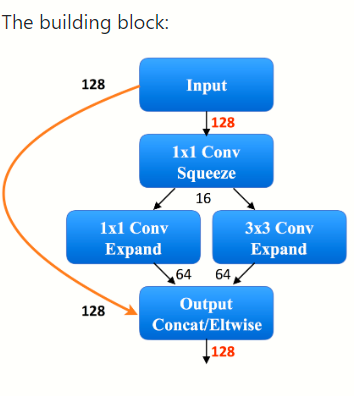

In [ ]:
from torchvision import models

sqz_model_1_1 = models.squeezenet.squeezenet1_1()

In [ ]:
%load_ext autoreload
%autoreload 2
import torch
import torchvision
import torchvision.transforms as transforms
from RekogNizer import hyperparams


from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, Cutout, MotionBlur
from albumentations import (
    HorizontalFlip, Compose, RandomCrop, Cutout,Normalize, HorizontalFlip, RandomBrightnessContrast,
    Resize,RandomSizedCrop, MotionBlur,MultiplicativeNoise,InvertImg, IAAFliplr,
	IAAPerspective,
)
from albumentations.pytorch import ToTensor
import random

from torchvision.datasets.vision import VisionDataset
from torchvision.datasets.utils import check_integrity, download_and_extract_archive
import os
import sys
import numpy as np
from torchvision import datasets
#from RekogNizer import imgnetloader
from RekogNizer import basemodelclass
from RekogNizer import mmdlrfinder

from RekogNizer import mmdtraintest
from RekogNizer import mmddataloader
from RekogNizer import mmdlosses
from RekogNizer import mmdmodels

from RekogNizer import hyperparams
from RekogNizer import fileutils

from torch.utils.data import Dataset
import shutil
from tqdm import tqdm
from RekogNizer import mmdmodels

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, OneCycleLR, MultiStepLR, CyclicLR, ReduceLROnPlateau


import kornia

import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import wandb

  pip install torch-lr-finder -v --global-option="amp"
  pip install torch-lr-finder -v --global-option="amp"


In [ ]:
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
summary(sqz_model_1_1.to(device), input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 111, 111]           1,792
              ReLU-2         [-1, 64, 111, 111]               0
         MaxPool2d-3           [-1, 64, 55, 55]               0
            Conv2d-4           [-1, 16, 55, 55]           1,040
              ReLU-5           [-1, 16, 55, 55]               0
            Conv2d-6           [-1, 64, 55, 55]           1,088
              ReLU-7           [-1, 64, 55, 55]               0
            Conv2d-8           [-1, 64, 55, 55]           9,280
              ReLU-9           [-1, 64, 55, 55]               0
             Fire-10          [-1, 128, 55, 55]               0
           Conv2d-11           [-1, 16, 55, 55]           2,064
             ReLU-12           [-1, 16, 55, 55]               0
           Conv2d-13           [-1, 64, 55, 55]           1,088
             ReLU-14           [-1, 64,